![Rhyme](https://rhyme.com/assets/img/logo-dark.png)

# Task 1: Introduction

Welcome to Basic Image Classification with TensorFlow.

This graph describes the problem that we are trying to solve visually. We want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.

![Hand Written Digits Classification](images/1_1.png)

### Import TensorFlow

In [1]:
import tensorflow as tf

# tf.logging.set_verbosity(tf.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.3.0


# Task 2: The Dataset
### Import MNIST

In [3]:
from tensorflow.keras.datasets import mnist

(xtrain,ytrain), (xtest,ytest) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Shapes of Imported Arrays

In [5]:
print("xtrain shape", xtrain.shape)
print("ytrain shape", ytrain.shape)
print("xtest shape", xtest.shape)
print("ytest shape", ytest.shape)

xtrain shape (60000, 28, 28)
ytrain shape (60000,)
xtest shape (10000, 28, 28)
ytest shape (10000,)


### Plot an Image Example

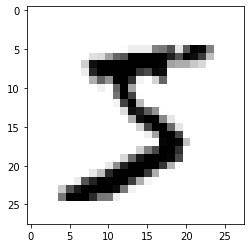

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(xtrain[0], cmap="binary")
plt.show()

### Display Labels

In [16]:
ytrain[0]

5

In [19]:
print(set(ytrain))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 3: One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [20]:
from tensorflow.keras.utils import to_categorical

ytrain_encoded = to_categorical(ytrain)
ytest_encoded = to_categorical(ytest)

### Validated Shapes

In [23]:
print("ytrain_encoded shape",ytrain_encoded.shape)
print("ytest_encoded shape",ytest_encoded.shape)

ytrain_encoded shape (60000, 10)
ytest_encoded shape (10000, 10)


### Display Encoded Labels

In [24]:
ytrain_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Task 4: Neural Networks

### Linear Equations

![Single Neuron](images/1_2.png)

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the weights and `b` is an intercept term called bias. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?

![Single Neuron with 784 features](images/1_3.png)

### Neural Networks

![Neural Network with 2 hidden layers](images/1_4.png)

This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

# Task 5: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [25]:
import numpy as np

xtrain_reshape = np.reshape(xtrain, (60000,784))
xtest_reshape = np.reshape(xtest, (10000,784))

In [27]:
print("xtrain_reshape shape",xtrain_reshape.shape)
print("xtest_reshape shape",xtest_reshape.shape)

xtrain_reshape shape (60000, 784)
xtest_reshape shape (10000, 784)


### Display Pixel Values

In [30]:
print(set(xtrain_reshape[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Data Normalization

In [31]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
xtrain_std = st.fit_transform(xtrain_reshape)
xtest_std = st.transform(xtest_reshape)

### Display Normalized Pixel Values

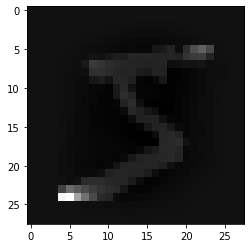

In [38]:
plt.imshow(xtrain_std[0].reshape(28,28),cmap="gray")

# Task 6: Creating a Model
### Creating the Model

In [39]:
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense

model = Sequential([Dense(128, activation = "relu",input_shape=(784,)),
                    Dense(128, activation = "relu"),
                    Dense(10, activation = "softmax")])

### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](images/1_5.png)

### Compiling the Model

In [40]:
model.compile(optimizer="adam", metrics="accuracy", loss="categorical_crossentropy")

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Task 7: Training the Model

### Training the Model

In [42]:
model.fit(xtrain_std,ytrain_encoded, batch_size=32, epochs=20, validation_data=(xtest_std,ytest_encoded))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2246 - accuracy: 0.9351 - val_loss: 0.1497 - val_accuracy: 0.9586
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1001 - accuracy: 0.9695 - val_loss: 0.1573 - val_accuracy: 0.9575
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0688 - accuracy: 0.9785 - val_loss: 0.1293 - val_accuracy: 0.9705
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0538 - accuracy: 0.9825 - val_loss: 0.1435 - val_accuracy: 0.9688
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0443 - accuracy: 0.9863 - val_loss: 0.1269 - val_accuracy: 0.9720
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0381 - accuracy: 0.9881 - val_loss: 0.1414 - val_accuracy: 0.9721
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0333 - accuracy: 0.9891 - val_loss: 0.1544 - val_accuracy:

### Evaluating the Model

In [43]:
loss, accuracy = model.evaluate(xtest_std,ytest_encoded)

313/313 [==============================] - 0s 939us/step - loss: 0.2586 - accuracy: 0.9747


# Task 8: Predictions

### Predictions on Test Set

In [47]:
predictions = model.predict(xtest_std)

In [54]:
np.argmax(predictions[0])

7

### Plotting the Results

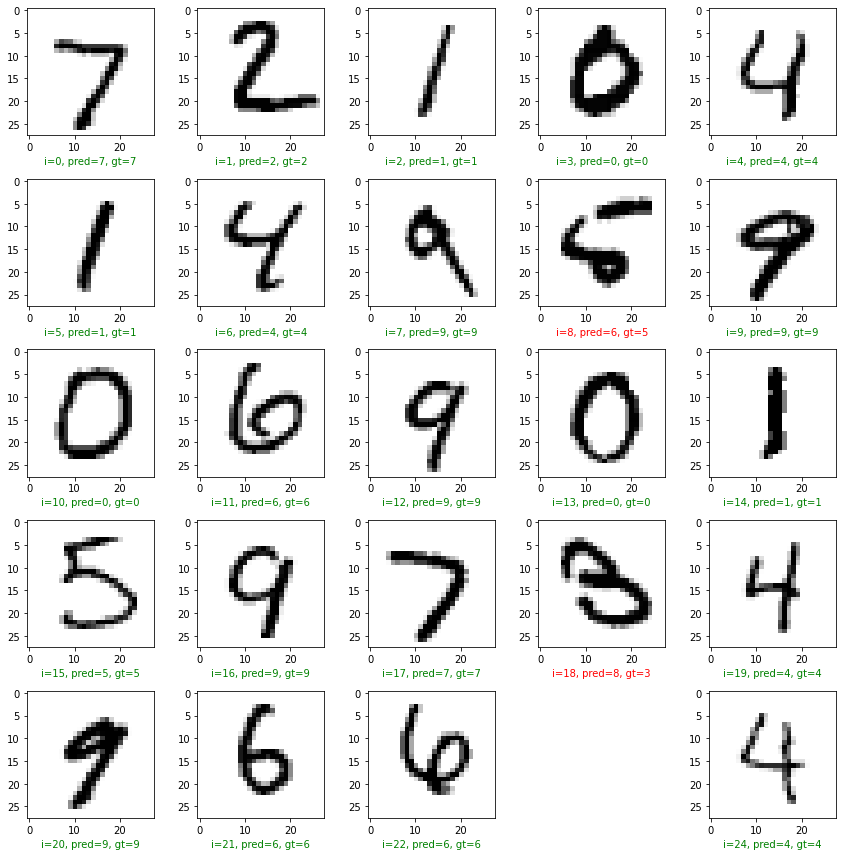

In [61]:
plt.figure(figsize=(12,12))

start_index = 0

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.grid(False)
  # plt.xticks(rotation=45)
  # plt.yticks([])
  
  preds = np.argmax([predictions[start_index+i]])
  gt = ytest[start_index+i]

  col = "g"
  if preds != gt:
    col ="r"

  plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i,preds,gt),color=col)
  plt.imshow(xtest[start_index+i], cmap="binary")
  plt.tight_layout()

plt.show()

